# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Load:home prices into a dataframe

In [2]:
df1 = pd.read_excel("House_Price_Dataset.xlsx")
df1.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df1.shape

(414, 9)

In [4]:
df1.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [5]:
df1.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
df2 = df1.drop(['Transaction date','latitude','longitude'],axis='columns')

In [7]:
df2.shape

(414, 6)

# Features Rename

In [8]:
df2.rename(columns = {'House Age':'house_age'}, inplace = True)
df2.rename(columns = {'Distance from nearest Metro station (km)':'metero_station_distance'}, inplace = True)
df2.rename(columns = {'Number of convenience stores':'convenience_stores'}, inplace = True)
df2.rename(columns = {'Number of bedrooms':'BHK'}, inplace = True)
df2.rename(columns = {'House size (sqft)':'total_sqft'}, inplace = True)
df2.rename(columns = {'House price of unit area':'house_price'}, inplace = True)

In [9]:
df2.describe()

,house_age,metero_station_distance,convenience_stores,BHK,total_sqft,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,3.000000,1500.000000,117.500000


# Feature Engineering

In [10]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['house_price']*100000/df3['total_sqft']
df3.head()

,house_age,metero_station_distance,convenience_stores,BHK,total_sqft,house_price,price_per_sqft
0,32.0,84.87882,10,1,575,37.9,6591.304348
1,19.5,306.59470,9,2,1240,42.2,3403.225806
2,13.3,561.98450,5,3,1060,47.3,4462.264151
3,13.3,561.98450,5,2,875,54.8,6262.857143
4,5.0,390.56840,5,1,491,43.1,8778.004073


In [11]:
df3_stats = df3['price_per_sqft'].describe()
df3_stats

count      414.000000
mean      4822.299468
std       2786.512184
min        556.776557
25%       2844.645947
50%       4102.985631
75%       6237.892403
max      18013.856813
Name: price_per_sqft, dtype: float64

# Outlier Removal Using Business Logic
##Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. For example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [12]:
df3[df3.total_sqft/df3.BHK<300].head()

,house_age,metero_station_distance,convenience_stores,BHK,total_sqft,house_price,price_per_sqft
5,7.1,2175.0300,3,3,828,32.1,3876.811594
47,35.9,640.7391,3,3,867,61.5,7093.425606
56,33.6,371.2495,8,3,883,41.9,4745.186863
87,16.9,4066.5870,0,3,878,18.3,2084.282460
97,28.4,617.4424,3,3,828,34.6,4178.743961


In [13]:
df3.price_per_sqft.describe()

count      414.000000
mean      4822.299468
std       2786.512184
min        556.776557
25%       2844.645947
50%       4102.985631
75%       6237.892403
max      18013.856813
Name: price_per_sqft, dtype: float64

# Outlier Checking for Price Per Square Feet Feature

Text(0, 0.5, 'Count')

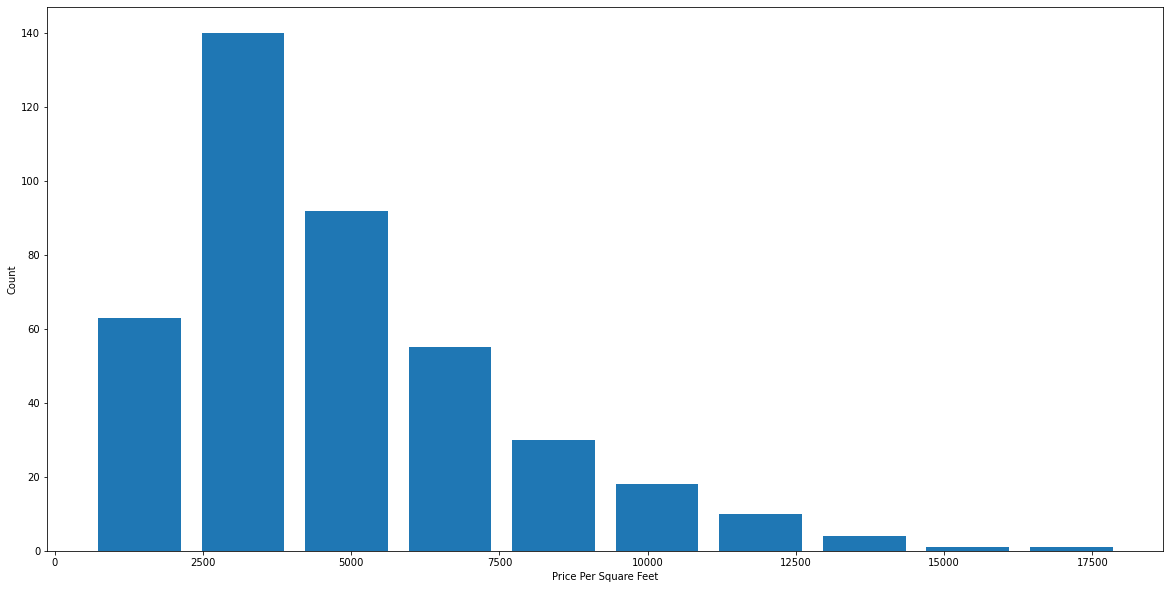

In [14]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [15]:
df3.convenience_stores.unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

# Outlier Checking for Convenience Stores Feature

Text(0, 0.5, 'Count')

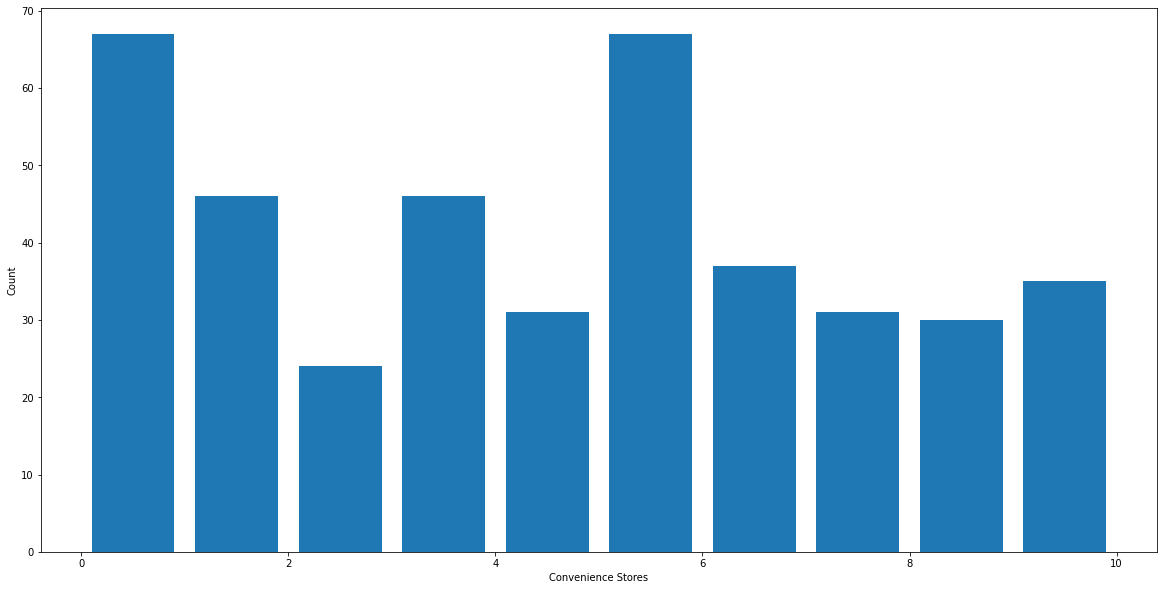

In [16]:
plt.hist(df3.convenience_stores,rwidth=0.8)
plt.xlabel("Convenience Stores")
plt.ylabel("Count")

# Outlier Checking for House age Feature

Text(0, 0.5, 'Count')

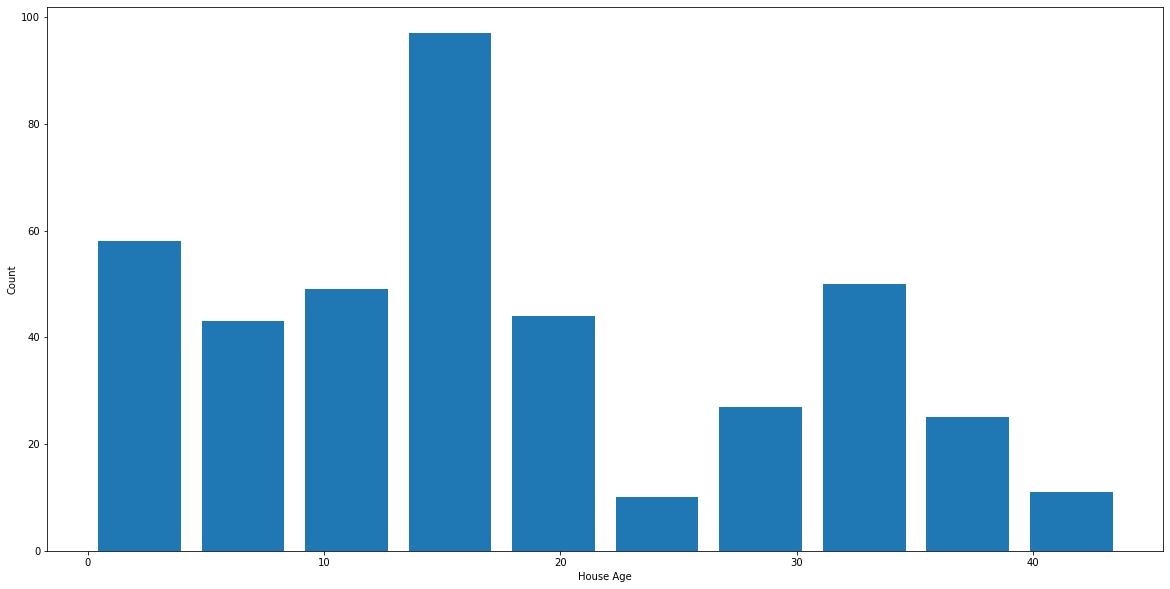

In [17]:
plt.hist(df3.house_age,rwidth=0.8)
plt.xlabel("House Age")
plt.ylabel("Count")

# Outlier Checking for Metero Station Distance Feature

Text(0, 0.5, 'Count')

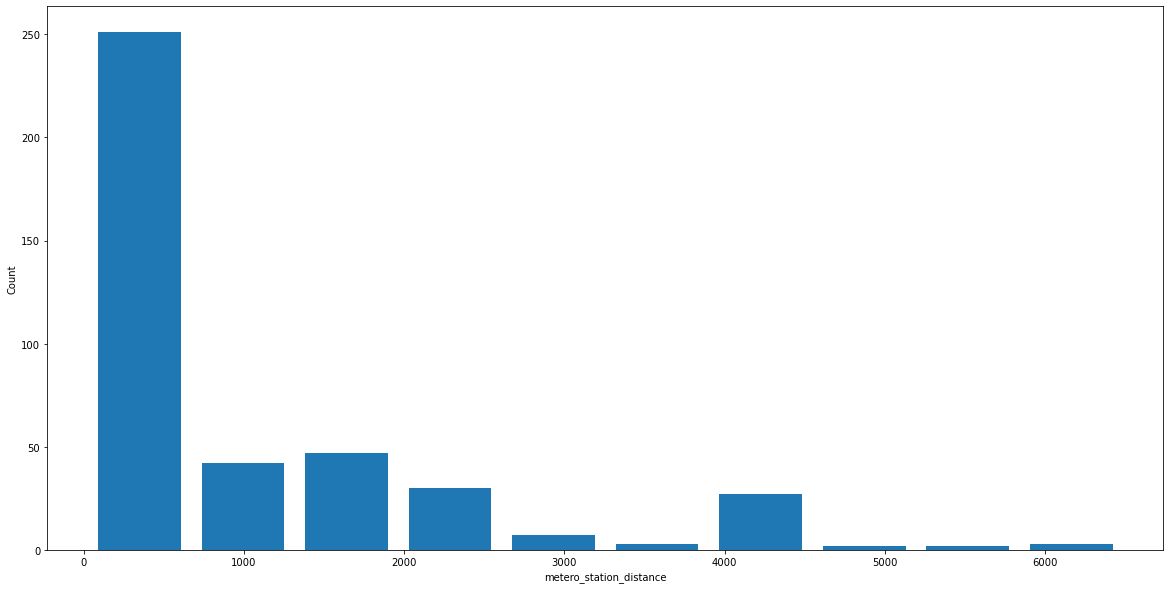

In [18]:
plt.hist(df3.metero_station_distance,rwidth=0.8)
plt.xlabel("metero_station_distance")
plt.ylabel("Count")

# Building a Model Now...

In [19]:
df3.shape

(414, 7)

In [20]:
X = df3.drop(['house_price'],axis='columns')
X.head(3)

,house_age,metero_station_distance,convenience_stores,BHK,total_sqft,price_per_sqft
0,32.0,84.87882,10,1,575,6591.304348
1,19.5,306.59470,9,2,1240,3403.225806
2,13.3,561.98450,5,3,1060,4462.264151


In [21]:
X.shape

(414, 6)

In [22]:
y = df3.house_price
y.head(3)

0    37.9
1    42.2
2    47.3
Name: house_price, dtype: float64

In [23]:
len(y)

414

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [25]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8798184891351243

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.8162588 , 0.84244654, 0.74470658, 0.83155464, 0.85166262])

# Find best model using GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

,model,best_score,best_params
0,linear_regression,0.817326,{'normalize': True}
1,lasso,0.805027,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.752541,"{'criterion': 'mse', 'splitter': 'best'}"


In [28]:
#Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Export the tested model to a pickle file

In [29]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)